<a href="https://colab.research.google.com/github/AngelTroncoso/Analisis_Financiero/blob/main/An%C3%A1lisis_Financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# ============================================================================
# ANÁLISIS FINANCIERO COMPLETO CON PANDAS
# Google Colaboratory Script
# ============================================================================

# Instalación e importación de librerías
!pip install plotly seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 ANÁLISIS FINANCIERO CON PANDAS")
print("=" * 50)



📊 ANÁLISIS FINANCIERO CON PANDAS


In [28]:
# ============================================================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# ============================================================================

# Datos JSON (reemplaza esto con tu archivo o carga desde archivo)
financial_data = {
    "transacciones_financieras": [
        {"id": 1, "fecha": "2024-01-15", "empresa": "TechCorp SA", "sector": "Tecnología", "tipo_transaccion": "Compra", "cantidad_acciones": 100, "precio_por_accion": 85.50, "valor_total": 8550.00, "moneda": "USD", "broker": "InvestBroker", "pais": "Chile", "volatilidad": 0.15, "dividend_yield": 0.02, "pe_ratio": 18.5},
        {"id": 2, "fecha": "2024-01-22", "empresa": "MiningSA", "sector": "Minería", "tipo_transaccion": "Venta", "cantidad_acciones": 50, "precio_por_accion": 125.75, "valor_total": 6287.50, "moneda": "USD", "broker": "MiningBroker", "pais": "Chile", "volatilidad": 0.25, "dividend_yield": 0.045, "pe_ratio": 12.3},
        {"id": 3, "fecha": "2024-02-01", "empresa": "RetailPlus", "sector": "Retail", "tipo_transaccion": "Compra", "cantidad_acciones": 200, "precio_por_accion": 45.25, "valor_total": 9050.00, "moneda": "CLP", "broker": "LocalBroker", "pais": "Chile", "volatilidad": 0.18, "dividend_yield": 0.035, "pe_ratio": 15.2},
        {"id": 4, "fecha": "2024-02-10", "empresa": "BankSafe", "sector": "Financiero", "tipo_transaccion": "Compra", "cantidad_acciones": 75, "precio_por_accion": 95.80, "valor_total": 7185.00, "moneda": "USD", "broker": "FinanceBroker", "pais": "Chile", "volatilidad": 0.12, "dividend_yield": 0.055, "pe_ratio": 11.8},
        {"id": 5, "fecha": "2024-02-18", "empresa": "EnergyMax", "sector": "Energía", "tipo_transaccion": "Venta", "cantidad_acciones": 150, "precio_por_accion": 78.90, "valor_total": 11835.00, "moneda": "USD", "broker": "EnergyBroker", "pais": "Chile", "volatilidad": 0.22, "dividend_yield": 0.04, "pe_ratio": 14.5},
        {"id": 6, "fecha": "2024-03-05", "empresa": "HealthTech", "sector": "Salud", "tipo_transaccion": "Compra", "cantidad_acciones": 80, "precio_por_accion": 112.40, "valor_total": 8992.00, "moneda": "USD", "broker": "HealthBroker", "pais": "Chile", "volatilidad": 0.20, "dividend_yield": 0.025, "pe_ratio": 22.1},
        {"id": 7, "fecha": "2024-03-12", "empresa": "AgriCorp", "sector": "Agricultura", "tipo_transaccion": "Compra", "cantidad_acciones": 120, "precio_por_accion": 55.60, "valor_total": 6672.00, "moneda": "CLP", "broker": "AgriBroker", "pais": "Chile", "volatilidad": 0.16, "dividend_yield": 0.038, "pe_ratio": 13.7},
        {"id": 8, "fecha": "2024-03-20", "empresa": "TechCorp SA", "sector": "Tecnología", "tipo_transaccion": "Venta", "cantidad_acciones": 50, "precio_por_accion": 92.75, "valor_total": 4637.50, "moneda": "USD", "broker": "InvestBroker", "pais": "Chile", "volatilidad": 0.15, "dividend_yield": 0.02, "pe_ratio": 19.2},
        {"id": 9, "fecha": "2024-04-02", "empresa": "TransportCorp", "sector": "Transporte", "tipo_transaccion": "Compra", "cantidad_acciones": 90, "precio_por_accion": 68.30, "valor_total": 6147.00, "moneda": "USD", "broker": "TransBroker", "pais": "Chile", "volatilidad": 0.19, "dividend_yield": 0.042, "pe_ratio": 16.4},
        {"id": 10, "fecha": "2024-04-15", "empresa": "RealEstate Plus", "sector": "Inmobiliario", "tipo_transaccion": "Compra", "cantidad_acciones": 60, "precio_por_accion": 135.20, "valor_total": 8112.00, "moneda": "USD", "broker": "RealtyBroker", "pais": "Chile", "volatilidad": 0.14, "dividend_yield": 0.065, "pe_ratio": 10.9},
        {"id": 11, "fecha": "2024-04-25", "empresa": "FoodCorp", "sector": "Alimentación", "tipo_transaccion": "Venta", "cantidad_acciones": 110, "precio_por_accion": 42.85, "valor_total": 4713.50, "moneda": "CLP", "broker": "FoodBroker", "pais": "Chile", "volatilidad": 0.11, "dividend_yield": 0.048, "pe_ratio": 14.8},
        {"id": 12, "fecha": "2024-05-08", "empresa": "TeleCom SA", "sector": "Telecomunicaciones", "tipo_transaccion": "Compra", "cantidad_acciones": 85, "precio_por_accion": 88.90, "valor_total": 7556.50, "moneda": "USD", "broker": "TeleBroker", "pais": "Chile", "volatilidad": 0.13, "dividend_yield": 0.055, "pe_ratio": 12.6},
        {"id": 13, "fecha": "2024-05-18", "empresa": "ChemicalCorp", "sector": "Químico", "tipo_transaccion": "Compra", "cantidad_acciones": 70, "precio_por_accion": 156.75, "valor_total": 10972.50, "moneda": "USD", "broker": "ChemBroker", "pais": "Chile", "volatilidad": 0.21, "dividend_yield": 0.035, "pe_ratio": 17.3},
        {"id": 14, "fecha": "2024-05-28", "empresa": "RetailPlus", "sector": "Retail", "tipo_transaccion": "Venta", "cantidad_acciones": 100, "precio_por_accion": 48.60, "valor_total": 4860.00, "moneda": "CLP", "broker": "LocalBroker", "pais": "Chile", "volatilidad": 0.18, "dividend_yield": 0.035, "pe_ratio": 16.1},
        {"id": 15, "fecha": "2024-06-05", "empresa": "AutoCorp", "sector": "Automotriz", "tipo_transaccion": "Compra", "cantidad_acciones": 95, "precio_por_accion": 73.45, "valor_total": 6977.75, "moneda": "USD", "broker": "AutoBroker", "pais": "Chile", "volatilidad": 0.24, "dividend_yield": 0.028, "pe_ratio": 20.7},
        {"id": 16, "fecha": "2024-06-15", "empresa": "EnergyMax", "sector": "Energía", "tipo_transaccion": "Compra", "cantidad_acciones": 130, "precio_por_accion": 82.15, "valor_total": 10679.50, "moneda": "USD", "broker": "EnergyBroker", "pais": "Chile", "volatilidad": 0.22, "dividend_yield": 0.04, "pe_ratio": 15.2},
        {"id": 17, "fecha": "2024-06-25", "empresa": "WaterCorp", "sector": "Servicios Públicos", "tipo_transaccion": "Compra", "cantidad_acciones": 140, "precio_por_accion": 38.90, "valor_total": 5446.00, "moneda": "CLP", "broker": "UtilityBroker", "pais": "Chile", "volatilidad": 0.08, "dividend_yield": 0.058, "pe_ratio": 9.4},
        {"id": 18, "fecha": "2024-07-03", "empresa": "BankSafe", "sector": "Financiero", "tipo_transaccion": "Venta", "cantidad_acciones": 40, "precio_por_accion": 101.30, "valor_total": 4052.00, "moneda": "USD", "broker": "FinanceBroker", "pais": "Chile", "volatilidad": 0.12, "dividend_yield": 0.055, "pe_ratio": 12.5},
        {"id": 19, "fecha": "2024-07-12", "empresa": "MediaCorp", "sector": "Medios", "tipo_transaccion": "Compra", "cantidad_acciones": 105, "precio_por_accion": 29.80, "valor_total": 3129.00, "moneda": "CLP", "broker": "MediaBroker", "pais": "Chile", "volatilidad": 0.28, "dividend_yield": 0.015, "pe_ratio": 25.3},
        {"id": 20, "fecha": "2024-07-20", "empresa": "HealthTech", "sector": "Salud", "tipo_transaccion": "Venta", "cantidad_acciones": 35, "precio_por_accion": 118.75, "valor_total": 4156.25, "moneda": "USD", "broker": "HealthBroker", "pais": "Chile", "volatilidad": 0.20, "dividend_yield": 0.025, "pe_ratio": 23.8}
    ],
    "indicadores_economicos": [
        {"fecha": "2024-01-01", "pib_crecimiento": 2.3, "inflacion": 3.8, "tasa_desempleo": 7.2, "tipo_cambio_usd_clp": 890.5, "tasa_interes_central": 11.25, "precio_cobre": 8420.0, "indice_bursatil": 5240.8},
        {"fecha": "2024-02-01", "pib_crecimiento": 2.1, "inflacion": 3.6, "tasa_desempleo": 7.0, "tipo_cambio_usd_clp": 895.2, "tasa_interes_central": 11.0, "precio_cobre": 8380.5, "indice_bursatil": 5298.3},
        {"fecha": "2024-03-01", "pib_crecimiento": 2.4, "inflacion": 3.4, "tasa_desempleo": 6.8, "tipo_cambio_usd_clp": 888.7, "tasa_interes_central": 10.75, "precio_cobre": 8510.2, "indice_bursatil": 5367.9},
        {"fecha": "2024-04-01", "pib_crecimiento": 2.6, "inflacion": 3.2, "tasa_desempleo": 6.9, "tipo_cambio_usd_clp": 883.1, "tasa_interes_central": 10.5, "precio_cobre": 8645.8, "indice_bursatil": 5425.6},
        {"fecha": "2024-05-01", "pib_crecimiento": 2.8, "inflacion": 3.0, "tasa_desempleo": 6.7, "tipo_cambio_usd_clp": 878.9, "tasa_interes_central": 10.25, "precio_cobre": 8720.3, "indice_bursatil": 5489.2},
        {"fecha": "2024-06-01", "pib_crecimiento": 3.0, "inflacion": 2.9, "tasa_desempleo": 6.5, "tipo_cambio_usd_clp": 875.4, "tasa_interes_central": 10.0, "precio_cobre": 8856.7, "indice_bursatil": 5556.8},
        {"fecha": "2024-07-01", "pib_crecimiento": 3.1, "inflacion": 2.8, "tasa_desempleo": 6.4, "tipo_cambio_usd_clp": 872.6, "tasa_interes_central": 9.75, "precio_cobre": 8923.1, "indice_bursatil": 5612.4}
    ]
}

# Crear DataFrames
df_trans = pd.DataFrame(financial_data['transacciones_financieras'])
df_ind = pd.DataFrame(financial_data['indicadores_economicos'])

# Convertir fechas
df_trans['fecha'] = pd.to_datetime(df_trans['fecha'])
df_ind['fecha'] = pd.to_datetime(df_ind['fecha'])

# Agregar columnas calculadas
df_trans['mes'] = df_trans['fecha'].dt.month
df_trans['año'] = df_trans['fecha'].dt.year
df_trans['mes_año'] = df_trans['fecha'].dt.to_period('M')

print("✅ Datos cargados exitosamente")
print(f"📈 Transacciones: {len(df_trans)} registros")
print(f"📊 Indicadores económicos: {len(df_ind)} registros")
print("\n")

✅ Datos cargados exitosamente
📈 Transacciones: 20 registros
📊 Indicadores económicos: 7 registros




🏭 ANÁLISIS POR SECTORES Y PERFORMANCE
📊 Análisis por Sectores:
                    volumen_total  valor_promedio  num_transacciones  \
sector                                                                 
Agricultura               6672.00         6672.00                  1   
Alimentación              4713.50         4713.50                  1   
Automotriz                6977.75         6977.75                  1   
Energía                  22514.50        11257.25                  2   
Financiero               11237.00         5618.50                  2   
Inmobiliario              8112.00         8112.00                  1   
Medios                    3129.00         3129.00                  1   
Minería                   6287.50         6287.50                  1   
Químico                  10972.50        10972.50                  1   
Retail                   13910.00         6955.00                  2   
Salud                    13148.25         6574.12                  2   
S

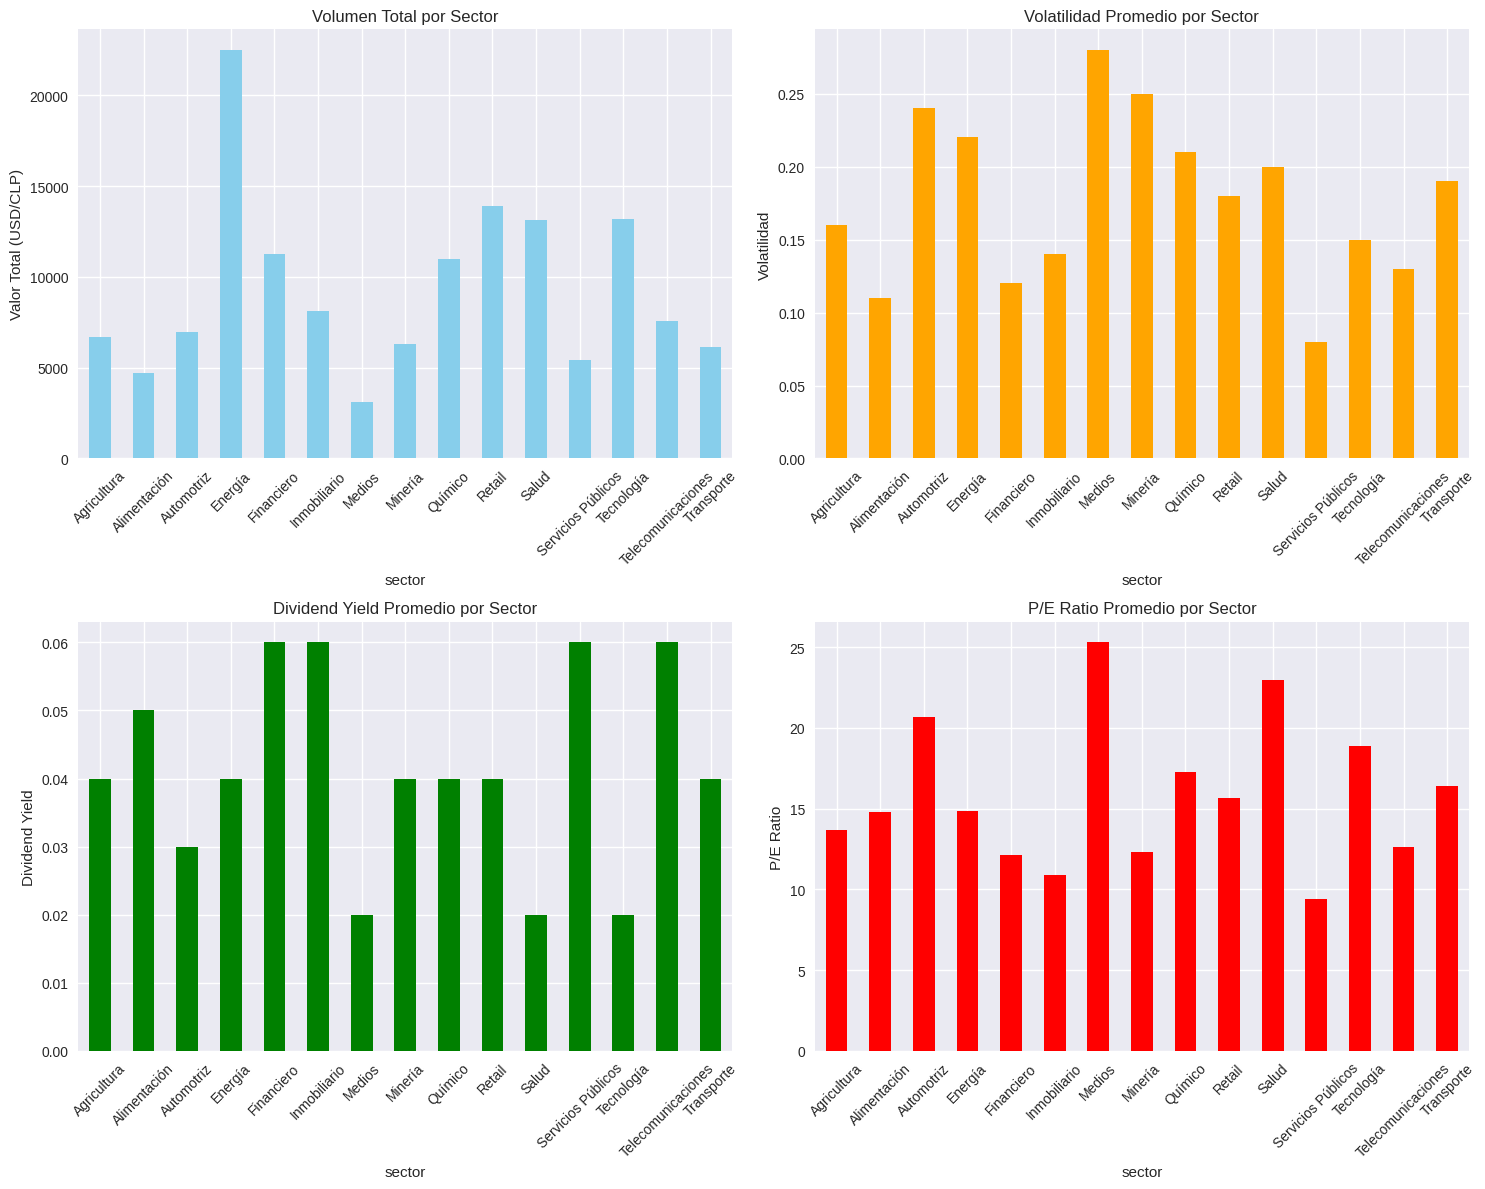

In [29]:
# 2. ANÁLISIS POR SECTORES Y PERFORMANCE
# ============================================================================

print("🏭 ANÁLISIS POR SECTORES Y PERFORMANCE")
print("=" * 50)

# Análisis por sectores
sector_analysis = df_trans.groupby('sector').agg({
    'valor_total': ['sum', 'mean', 'count'],
    'precio_por_accion': 'mean',
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'pe_ratio': 'mean'
}).round(2)

sector_analysis.columns = ['_'.join(col).strip() for col in sector_analysis.columns]
sector_analysis = sector_analysis.rename(columns={
    'valor_total_sum': 'volumen_total',
    'valor_total_mean': 'valor_promedio',
    'valor_total_count': 'num_transacciones',
    'precio_por_accion_mean': 'precio_promedio',
    'volatilidad_mean': 'volatilidad_promedio',
    'dividend_yield_mean': 'dividend_yield_promedio',
    'pe_ratio_mean': 'pe_ratio_promedio'
})

print("📊 Análisis por Sectores:")
print(sector_analysis)
print("\n")

# Performance por tipo de transacción
performance_tipo = df_trans.groupby(['sector', 'tipo_transaccion']).agg({
    'valor_total': 'sum',
    'cantidad_acciones': 'sum'
}).round(2)

print("💹 Performance por Tipo de Transacción:")
print(performance_tipo)
print("\n")

# Visualización - Volumen por sector
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Volumen total por sector
sector_analysis['volumen_total'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Volumen Total por Sector')
axes[0,0].set_ylabel('Valor Total (USD/CLP)')
axes[0,0].tick_params(axis='x', rotation=45)

# Gráfico 2: Volatilidad promedio por sector
sector_analysis['volatilidad_promedio'].plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Volatilidad Promedio por Sector')
axes[0,1].set_ylabel('Volatilidad')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3: Dividend Yield por sector
sector_analysis['dividend_yield_promedio'].plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title('Dividend Yield Promedio por Sector')
axes[1,0].set_ylabel('Dividend Yield')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: P/E Ratio por sector
sector_analysis['pe_ratio_promedio'].plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('P/E Ratio Promedio por Sector')
axes[1,1].set_ylabel('P/E Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

📈 CORRELACIONES ENTRE INDICADORES ECONÓMICOS
🔗 Matriz de Correlaciones:
                      pib_crecimiento  inflacion  tasa_desempleo  \
pib_crecimiento                 1.000     -0.942          -0.896   
inflacion                      -0.942      1.000           0.949   
tasa_desempleo                 -0.896      0.949           1.000   
tipo_cambio_usd_clp            -0.999      0.942           0.882   
tasa_interes_central           -0.955      0.991           0.966   
precio_cobre                    0.993     -0.964          -0.923   
indice_bursatil                 0.958     -0.992          -0.968   

                      tipo_cambio_usd_clp  tasa_interes_central  precio_cobre  \
pib_crecimiento                    -0.999                -0.955         0.993   
inflacion                           0.942                 0.991        -0.964   
tasa_desempleo                      0.882                 0.966        -0.923   
tipo_cambio_usd_clp                 1.000                 0

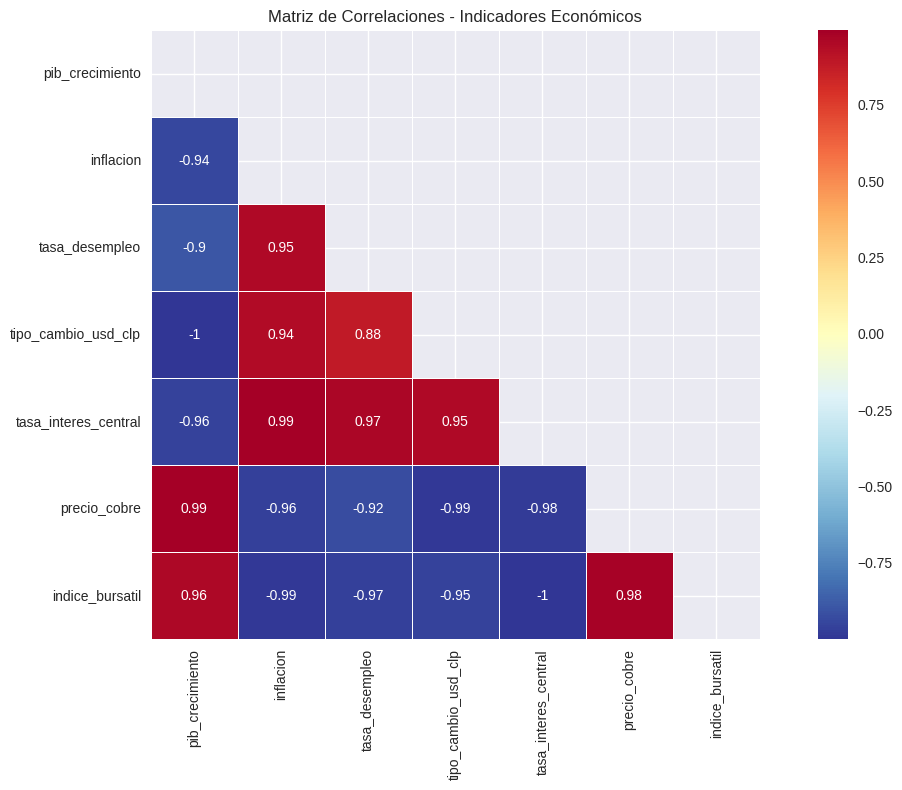

💪 Correlaciones Fuertes (>0.7):
pib_crecimiento vs inflacion: -0.942
pib_crecimiento vs tasa_desempleo: -0.896
pib_crecimiento vs tipo_cambio_usd_clp: -0.999
pib_crecimiento vs tasa_interes_central: -0.955
pib_crecimiento vs precio_cobre: 0.993
pib_crecimiento vs indice_bursatil: 0.958
inflacion vs pib_crecimiento: -0.942
inflacion vs tasa_desempleo: 0.949
inflacion vs tipo_cambio_usd_clp: 0.942
inflacion vs tasa_interes_central: 0.991
inflacion vs precio_cobre: -0.964
inflacion vs indice_bursatil: -0.992
tasa_desempleo vs pib_crecimiento: -0.896
tasa_desempleo vs inflacion: 0.949
tasa_desempleo vs tipo_cambio_usd_clp: 0.882
tasa_desempleo vs tasa_interes_central: 0.966
tasa_desempleo vs precio_cobre: -0.923
tasa_desempleo vs indice_bursatil: -0.968
tipo_cambio_usd_clp vs pib_crecimiento: -0.999
tipo_cambio_usd_clp vs inflacion: 0.942
tipo_cambio_usd_clp vs tasa_desempleo: 0.882
tipo_cambio_usd_clp vs tasa_interes_central: 0.952
tipo_cambio_usd_clp vs precio_cobre: -0.991
tipo_cambio_u

In [30]:
# 3. CORRELACIONES ENTRE INDICADORES ECONÓMICOS
# ============================================================================

print("📈 CORRELACIONES ENTRE INDICADORES ECONÓMICOS")
print("=" * 50)

# Matriz de correlación
correlation_matrix = df_ind.select_dtypes(include=[np.number]).corr()
print("🔗 Matriz de Correlaciones:")
print(correlation_matrix.round(3))
print("\n")

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlaciones - Indicadores Económicos')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes
correlations_flat = correlation_matrix.unstack()
correlations_flat = correlations_flat[correlations_flat != 1.0]
strong_correlations = correlations_flat[abs(correlations_flat) > 0.7]

print("💪 Correlaciones Fuertes (>0.7):")
for pair, corr in strong_correlations.items():
    print(f"{pair[0]} vs {pair[1]}: {corr:.3f}")
print("\n")


⏰ ANÁLISIS TEMPORAL DE TRANSACCIONES
📅 Análisis Mensual:
         valor_total  cantidad_acciones  precio_por_accion
mes_año                                                   
2024-01     14837.50                150             105.62
2024-02     28070.00                425              73.32
2024-03     20301.50                250              86.92
2024-04     18972.50                260              82.12
2024-05     23389.00                255              98.08
2024-06     23103.25                365              64.83
2024-07     11337.25                180              83.28


📊 Volumen Mensual por Sector:
sector   Agricultura  Alimentación  Automotriz  Energía  Financiero  \
mes_año                                                               
2024-01          0.0           0.0        0.00      0.0         0.0   
2024-02          0.0           0.0        0.00  11835.0      7185.0   
2024-03       6672.0           0.0        0.00      0.0         0.0   
2024-04          0.0     

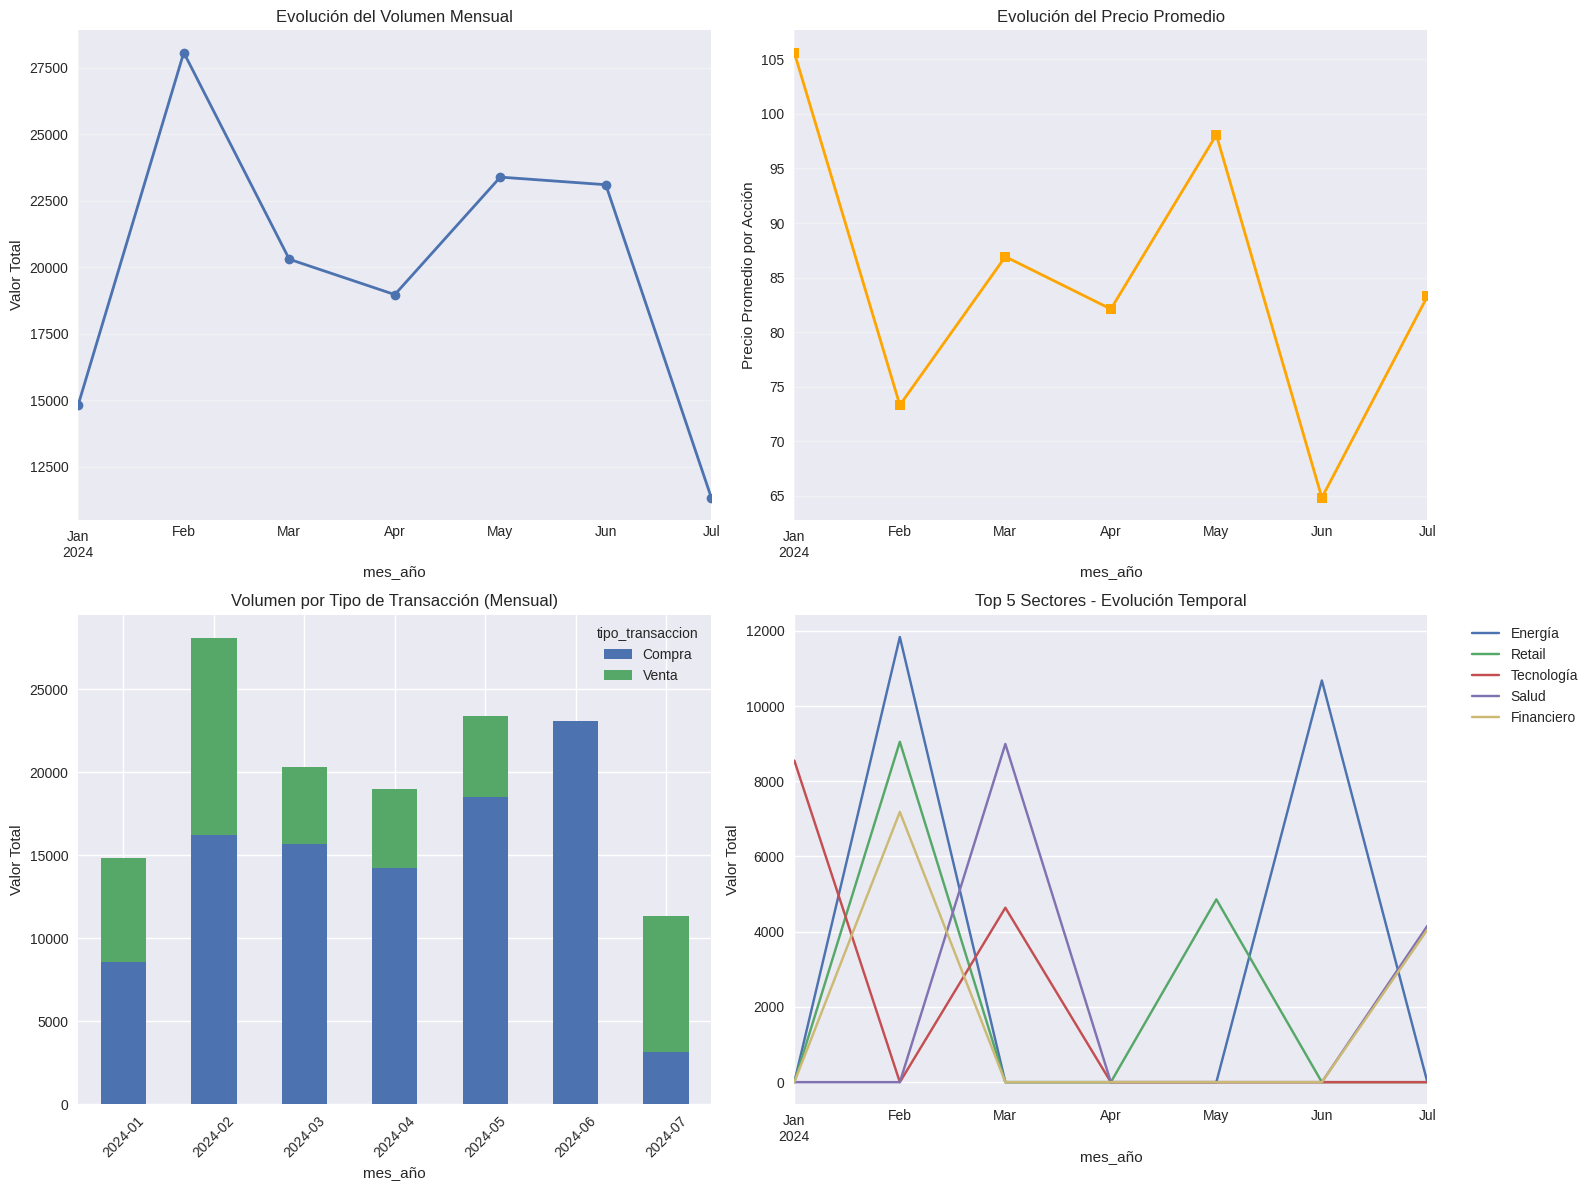

In [31]:
# ============================================================================
# 4. ANÁLISIS TEMPORAL DE TRANSACCIONES
# ============================================================================

print("⏰ ANÁLISIS TEMPORAL DE TRANSACCIONES")
print("=" * 50)

# Análisis mensual
monthly_analysis = df_trans.groupby('mes_año').agg({
    'valor_total': 'sum',
    'cantidad_acciones': 'sum',
    'precio_por_accion': 'mean'
}).round(2)

print("📅 Análisis Mensual:")
print(monthly_analysis)
print("\n")

# Tendencia temporal por sector
sector_temporal = df_trans.groupby(['mes_año', 'sector'])['valor_total'].sum().unstack(fill_value=0)

print("📊 Volumen Mensual por Sector:")
print(sector_temporal)
print("\n")

# Visualización temporal
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Volumen mensual total
monthly_analysis['valor_total'].plot(kind='line', ax=axes[0,0], marker='o', linewidth=2)
axes[0,0].set_title('Evolución del Volumen Mensual')
axes[0,0].set_ylabel('Valor Total')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Precio promedio mensual
monthly_analysis['precio_por_accion'].plot(kind='line', ax=axes[0,1], marker='s', color='orange', linewidth=2)
axes[0,1].set_title('Evolución del Precio Promedio')
axes[0,1].set_ylabel('Precio Promedio por Acción')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Transacciones por tipo a lo largo del tiempo
tipo_temporal = df_trans.groupby(['mes_año', 'tipo_transaccion'])['valor_total'].sum().unstack(fill_value=0)
tipo_temporal.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Volumen por Tipo de Transacción (Mensual)')
axes[1,0].set_ylabel('Valor Total')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: Top 5 sectores por volumen temporal
top_sectors = sector_analysis.nlargest(5, 'volumen_total').index
sector_temporal[top_sectors].plot(ax=axes[1,1])
axes[1,1].set_title('Top 5 Sectores - Evolución Temporal')
axes[1,1].set_ylabel('Valor Total')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



⚖️ MÉTRICAS DE RIESGO Y RENTABILIDAD
📊 Métricas de Riesgo por Empresa:
                 volatilidad_promedio  dividend_yield_promedio  \
empresa                                                          
WaterCorp                        0.08                    0.058   
RealEstate Plus                  0.14                    0.065   
BankSafe                         0.12                    0.055   
FoodCorp                         0.11                    0.048   
TeleCom SA                       0.13                    0.055   
AgriCorp                         0.16                    0.038   
TransportCorp                    0.19                    0.042   
RetailPlus                       0.18                    0.035   
EnergyMax                        0.22                    0.040   
MiningSA                         0.25                    0.045   
ChemicalCorp                     0.21                    0.035   
TechCorp SA                      0.15                    0.020   
Healt

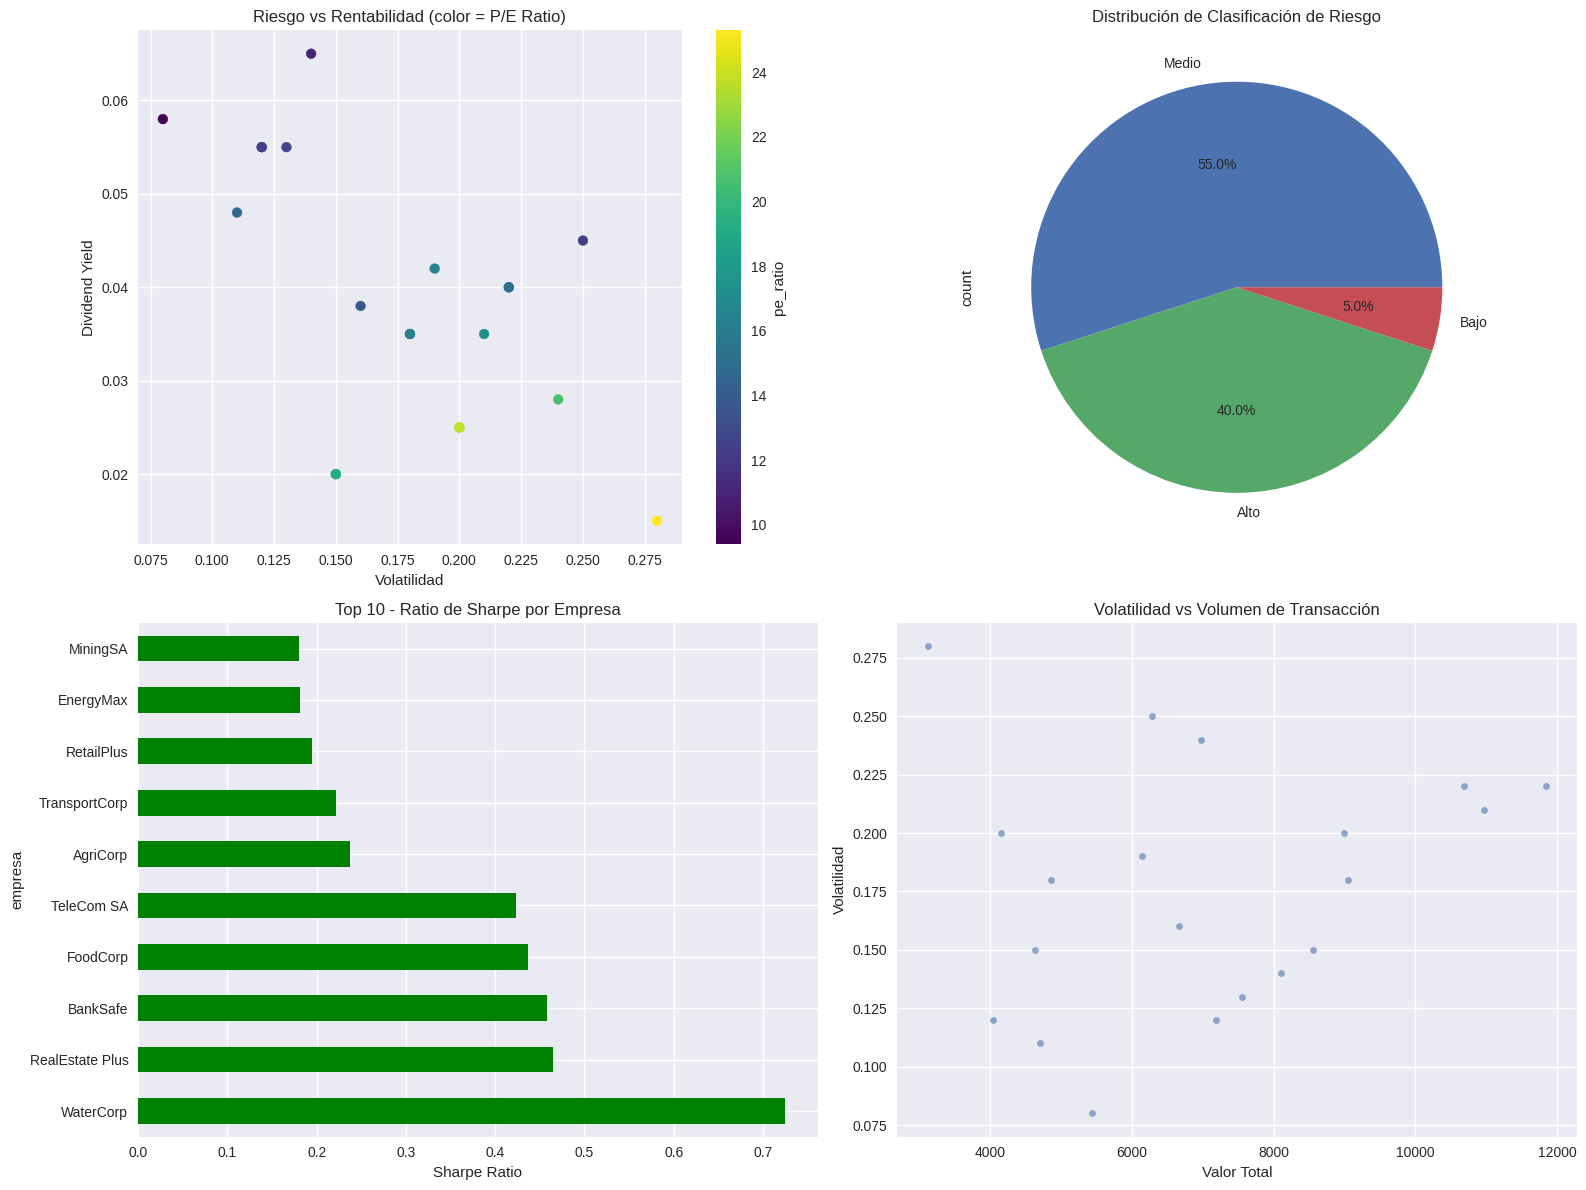

In [32]:
# ============================================================================
# 5. MÉTRICAS DE RIESGO Y RENTABILIDAD
# ============================================================================

print("⚖️ MÉTRICAS DE RIESGO Y RENTABILIDAD")
print("=" * 50)

# Métricas por empresa
risk_metrics = df_trans.groupby('empresa').agg({
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'pe_ratio': 'mean',
    'precio_por_accion': ['mean', 'std'],
    'valor_total': 'sum'
}).round(4)

risk_metrics.columns = ['_'.join(col).strip() for col in risk_metrics.columns]
risk_metrics = risk_metrics.rename(columns={
    'volatilidad_mean': 'volatilidad_promedio',
    'dividend_yield_mean': 'dividend_yield_promedio',
    'pe_ratio_mean': 'pe_ratio_promedio',
    'precio_por_accion_mean': 'precio_promedio',
    'precio_por_accion_std': 'precio_volatilidad',
    'valor_total_sum': 'volumen_total'
})

# Calcular ratio de Sharpe simplificado (dividend_yield / volatilidad)
risk_metrics['sharpe_ratio'] = (risk_metrics['dividend_yield_promedio'] /
                               risk_metrics['volatilidad_promedio']).round(4)

print("📊 Métricas de Riesgo por Empresa:")
print(risk_metrics.sort_values('sharpe_ratio', ascending=False))
print("\n")

# Clasificación de riesgo
def classify_risk(volatility):
    if volatility < 0.10:
        return 'Bajo'
    elif volatility < 0.20:
        return 'Medio'
    else:
        return 'Alto'

df_trans['clasificacion_riesgo'] = df_trans['volatilidad'].apply(classify_risk)

risk_distribution = df_trans['clasificacion_riesgo'].value_counts()
print("🎯 Distribución de Riesgo:")
print(risk_distribution)
print("\n")

# Visualización de métricas de riesgo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Scatter Volatilidad vs Dividend Yield
df_trans.plot.scatter(x='volatilidad', y='dividend_yield', ax=axes[0,0],
                     c='pe_ratio', colormap='viridis', s=50)
axes[0,0].set_title('Riesgo vs Rentabilidad (color = P/E Ratio)')
axes[0,0].set_xlabel('Volatilidad')
axes[0,0].set_ylabel('Dividend Yield')

# Gráfico 2: Distribución de riesgo
risk_distribution.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Distribución de Clasificación de Riesgo')

# Gráfico 3: Sharpe Ratio por empresa (top 10)
top_sharpe = risk_metrics.nlargest(10, 'sharpe_ratio')['sharpe_ratio']
top_sharpe.plot(kind='barh', ax=axes[1,0], color='green')
axes[1,0].set_title('Top 10 - Ratio de Sharpe por Empresa')
axes[1,0].set_xlabel('Sharpe Ratio')

# Gráfico 4: Volatilidad vs Volumen
df_trans.plot.scatter(x='valor_total', y='volatilidad', ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Volatilidad vs Volumen de Transacción')
axes[1,1].set_xlabel('Valor Total')
axes[1,1].set_ylabel('Volatilidad')

plt.tight_layout()
plt.show()


📊 ANÁLISIS DE VOLATILIDAD POR SECTOR
📈 Estadísticas de Volatilidad por Sector:
                    promedio  mediana  desv_estandar  minimo  maximo  \
sector                                                                 
Medios                  0.28     0.28            NaN    0.28    0.28   
Minería                 0.25     0.25            NaN    0.25    0.25   
Automotriz              0.24     0.24            NaN    0.24    0.24   
Energía                 0.22     0.22            0.0    0.22    0.22   
Químico                 0.21     0.21            NaN    0.21    0.21   
Salud                   0.20     0.20            0.0    0.20    0.20   
Transporte              0.19     0.19            NaN    0.19    0.19   
Retail                  0.18     0.18            0.0    0.18    0.18   
Agricultura             0.16     0.16            NaN    0.16    0.16   
Tecnología              0.15     0.15            0.0    0.15    0.15   
Inmobiliario            0.14     0.14            NaN    0

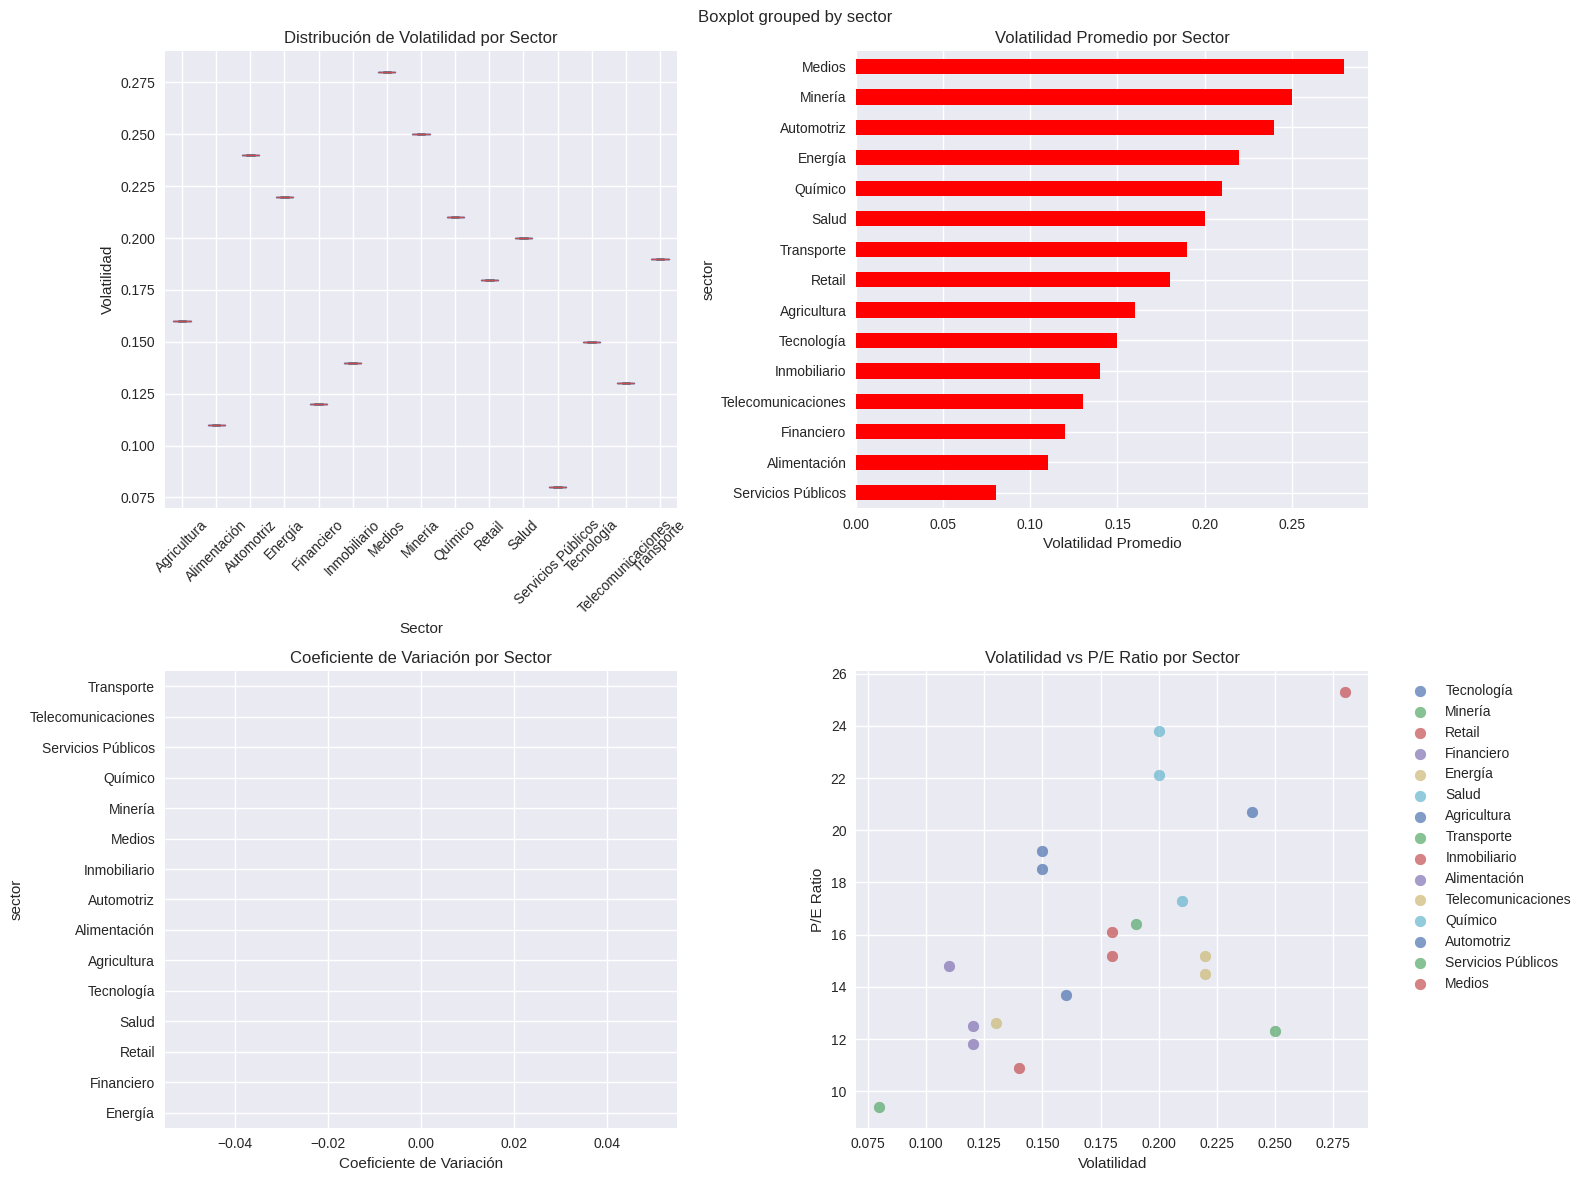

In [33]:
# 6. ANÁLISIS DE VOLATILIDAD POR SECTOR
# ============================================================================

print("📊 ANÁLISIS DE VOLATILIDAD POR SECTOR")
print("=" * 50)

# Estadísticas de volatilidad por sector
volatility_stats = df_trans.groupby('sector')['volatilidad'].agg([
    'mean', 'median', 'std', 'min', 'max', 'count'
]).round(4)

volatility_stats.columns = ['promedio', 'mediana', 'desv_estandar', 'minimo', 'maximo', 'n_transacciones']

print("📈 Estadísticas de Volatilidad por Sector:")
print(volatility_stats.sort_values('promedio', ascending=False))
print("\n")

# Análisis de riesgo sistémico por sector
sector_risk = df_trans.groupby('sector').agg({
    'volatilidad': ['mean', 'std'],
    'pe_ratio': 'mean',
    'dividend_yield': 'mean',
    'valor_total': 'sum'
}).round(4)

sector_risk.columns = ['_'.join(col).strip() for col in sector_risk.columns]
sector_risk['coef_variacion'] = (sector_risk['volatilidad_std'] /
                                sector_risk['volatilidad_mean']).round(4)

print("⚠️ Análisis de Riesgo Sistémico por Sector:")
print(sector_risk.sort_values('volatilidad_mean', ascending=False))
print("\n")

# Visualización de volatilidad
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Box plot de volatilidad por sector
df_trans.boxplot(column='volatilidad', by='sector', ax=axes[0,0])
axes[0,0].set_title('Distribución de Volatilidad por Sector')
axes[0,0].set_xlabel('Sector')
axes[0,0].set_ylabel('Volatilidad')
plt.setp(axes[0,0].xaxis.get_majorticklabels(), rotation=45)

# Gráfico 2: Volatilidad promedio por sector
volatility_stats['promedio'].sort_values(ascending=True).plot(kind='barh', ax=axes[0,1], color='red')
axes[0,1].set_title('Volatilidad Promedio por Sector')
axes[0,1].set_xlabel('Volatilidad Promedio')

# Gráfico 3: Coeficiente de variación
sector_risk['coef_variacion'].sort_values(ascending=True).plot(kind='barh', ax=axes[1,0], color='orange')
axes[1,0].set_title('Coeficiente de Variación por Sector')
axes[1,0].set_xlabel('Coeficiente de Variación')

# Gráfico 4: Scatter Volatilidad vs P/E Ratio por sector
for sector in df_trans['sector'].unique():
    sector_data = df_trans[df_trans['sector'] == sector]
    axes[1,1].scatter(sector_data['volatilidad'], sector_data['pe_ratio'],
                     label=sector, alpha=0.7, s=60)

axes[1,1].set_title('Volatilidad vs P/E Ratio por Sector')
axes[1,1].set_xlabel('Volatilidad')
axes[1,1].set_ylabel('P/E Ratio')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

🏦 COMPARACIÓN DE BROKERS Y MONEDAS
🏪 Análisis por Broker:
               volumen_total  valor_promedio_transaccion  num_transacciones  \
broker                                                                        
EnergyBroker        22514.50                    11257.25                  2   
LocalBroker         13910.00                     6955.00                  2   
InvestBroker        13187.50                     6593.75                  2   
HealthBroker        13148.25                     6574.12                  2   
FinanceBroker       11237.00                     5618.50                  2   
ChemBroker          10972.50                    10972.50                  1   
RealtyBroker         8112.00                     8112.00                  1   
TeleBroker           7556.50                     7556.50                  1   
AutoBroker           6977.75                     6977.75                  1   
AgriBroker           6672.00                     6672.00                 

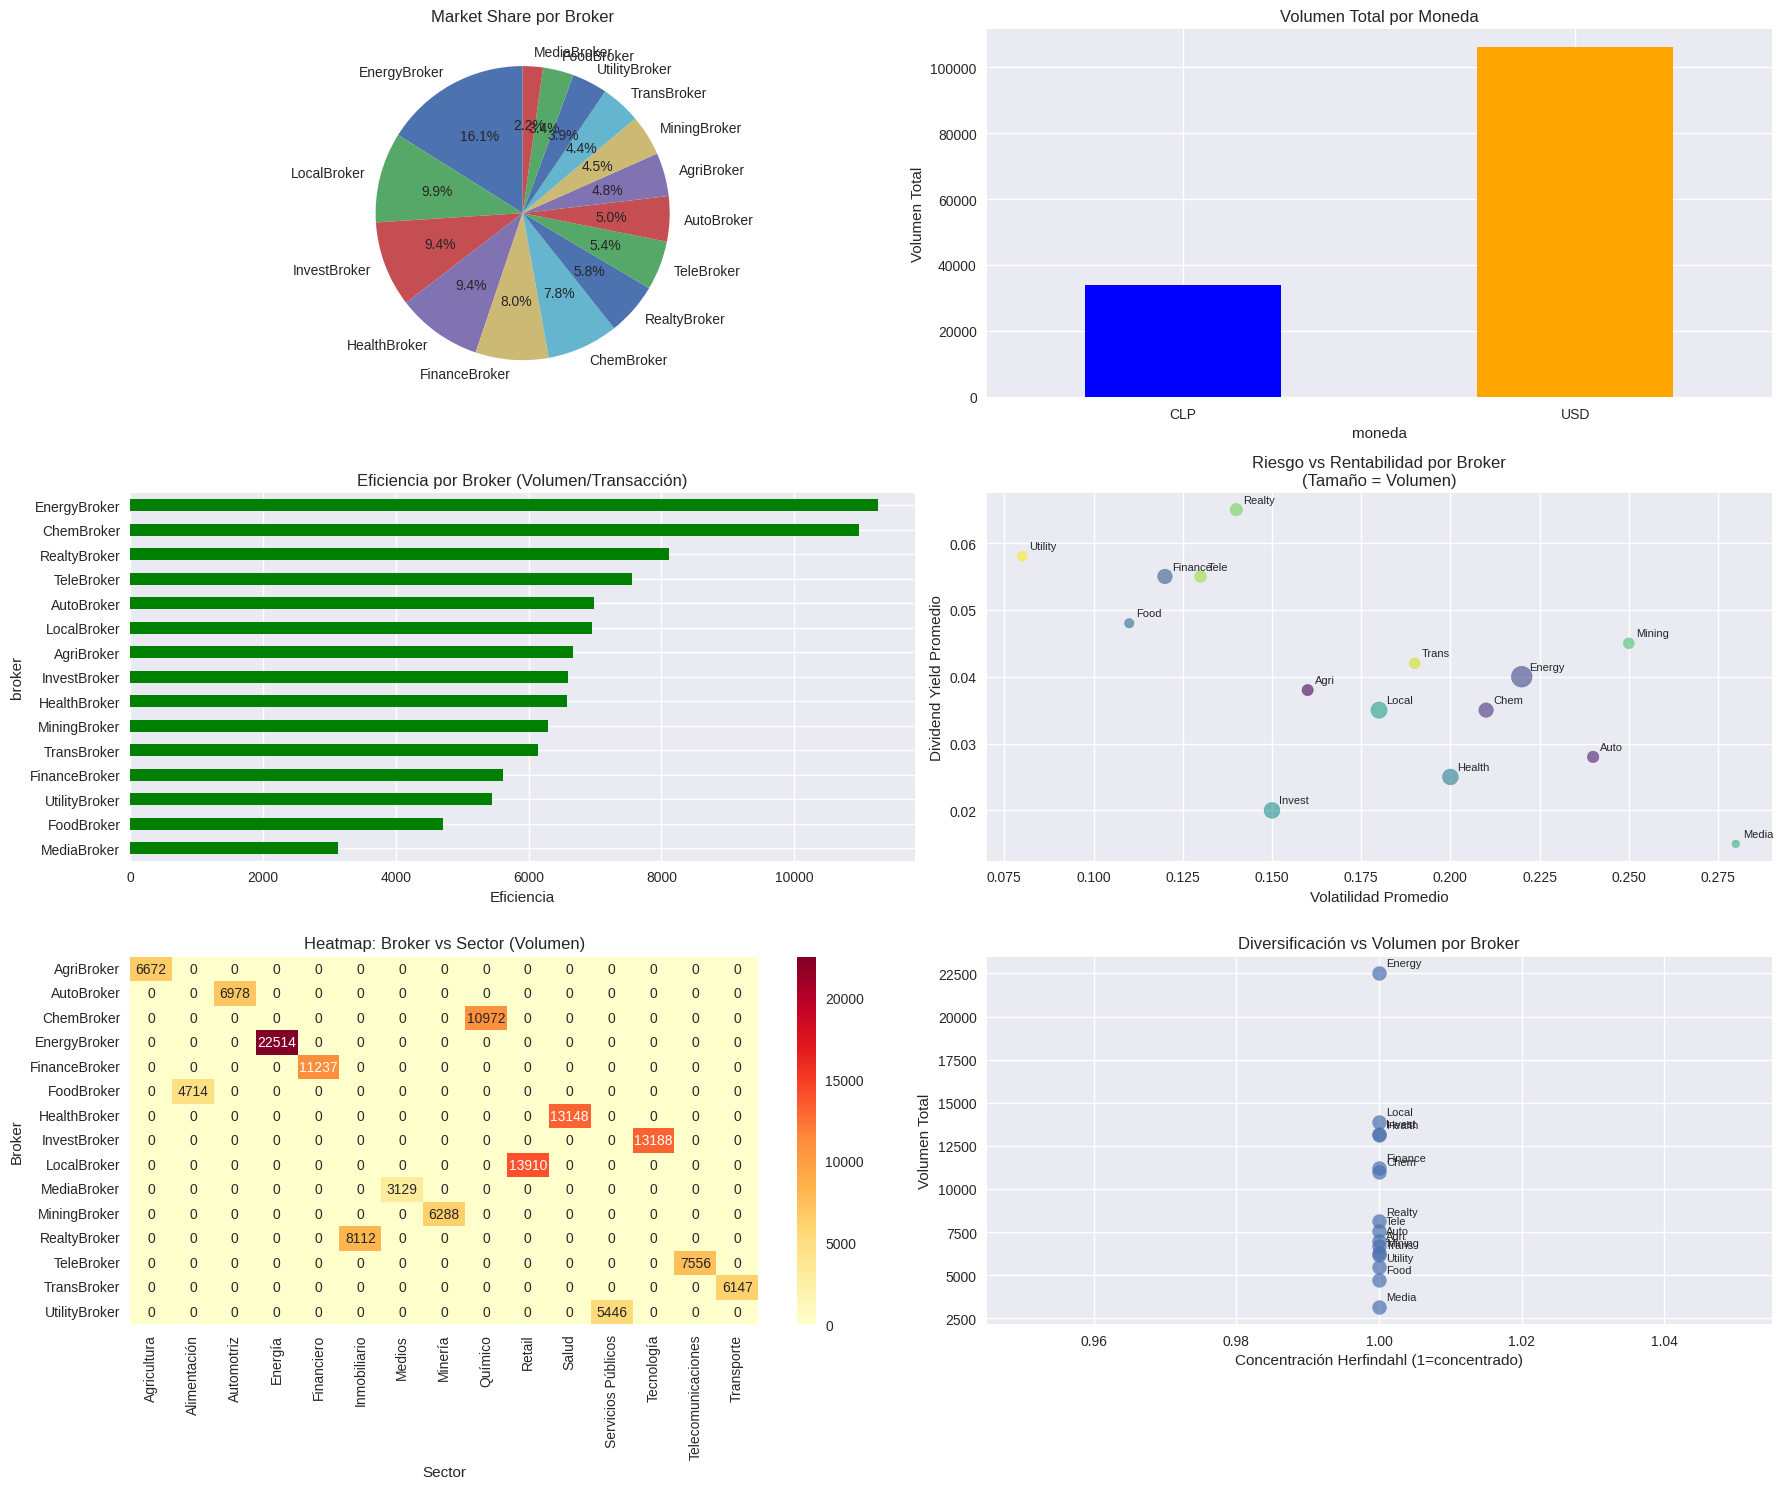

In [41]:
# ============================================================================
# 7. COMPARACIÓN DE BROKERS Y MONEDAS
# ============================================================================

print("🏦 COMPARACIÓN DE BROKERS Y MONEDAS")
print("=" * 50)

# Análisis por broker
broker_analysis = df_trans.groupby('broker').agg({
    'valor_total': ['sum', 'mean', 'count'],
    'cantidad_acciones': 'sum',
    'precio_por_accion': 'mean',
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'pe_ratio': 'mean'
}).round(2)

broker_analysis.columns = ['_'.join(col).strip() for col in broker_analysis.columns]
broker_analysis = broker_analysis.rename(columns={
    'valor_total_sum': 'volumen_total',
    'valor_total_mean': 'valor_promedio_transaccion',
    'valor_total_count': 'num_transacciones',
    'cantidad_acciones_sum': 'total_acciones',
    'precio_por_accion_mean': 'precio_promedio',
    'volatilidad_mean': 'riesgo_promedio',
    'dividend_yield_mean': 'rentabilidad_promedio',
    'pe_ratio_mean': 'pe_promedio'
})

print("🏪 Análisis por Broker:")
broker_analysis_sorted = broker_analysis.sort_values('volumen_total', ascending=False)
print(broker_analysis_sorted)
print("\n")

# Market share por broker
broker_analysis['market_share'] = (broker_analysis['volumen_total'] /
                                  broker_analysis['volumen_total'].sum() * 100).round(2)

print("📊 Market Share por Broker:")
market_share_sorted = broker_analysis[['volumen_total', 'market_share']].sort_values('market_share', ascending=False)
print(market_share_sorted)
print("\n")

# Análisis por moneda
currency_analysis = df_trans.groupby('moneda').agg({
    'valor_total': ['sum', 'mean', 'count'],
    'cantidad_acciones': 'sum',
    'precio_por_accion': 'mean',
    'volatilidad': 'mean',
    'dividend_yield': 'mean'
}).round(2)

currency_analysis.columns = ['_'.join(col).strip() for col in currency_analysis.columns]
currency_analysis = currency_analysis.rename(columns={
    'valor_total_sum': 'volumen_total',
    'valor_total_mean': 'valor_promedio',
    'valor_total_count': 'num_transacciones',
    'cantidad_acciones_sum': 'total_acciones',
    'precio_por_accion_mean': 'precio_promedio',
    'volatilidad_mean': 'volatilidad_promedio',
    'dividend_yield_mean': 'dividend_yield_promedio'
})

print("💱 Análisis por Moneda:")
print(currency_analysis)
print("\n")

# Análisis cruzado: Broker vs Sector
broker_sector = pd.crosstab(
    df_trans['broker'],
    df_trans['sector'],
    values=df_trans['valor_total'],
    aggfunc='sum'
).fillna(0)


print("🔄 Matriz Broker vs Sector (Volumen):")
print(broker_sector)
print("\n")

# Análisis cruzado: Moneda vs Sector
currency_sector = df_trans.pivot_table(
    index='moneda',
    columns='sector',
    values='valor_total',
    aggfunc='sum',
    fill_value=0
)


print("💰 Matriz Moneda vs Sector (Volumen):")
print(currency_sector)
print("\n")

# Eficiencia por broker (volumen/transacción)
broker_efficiency = df_trans.groupby('broker').agg({
    'valor_total': ['sum', 'count'],
    'volatilidad': 'mean'
}).round(2)

broker_efficiency.columns = ['volumen_total', 'num_transacciones', 'riesgo_promedio']
broker_efficiency['eficiencia'] = (broker_efficiency['volumen_total'] /
                                  broker_efficiency['num_transacciones']).round(2)
broker_efficiency['ratio_riesgo_volumen'] = (broker_efficiency['riesgo_promedio'] /
                                            (broker_efficiency['volumen_total'] / 1000)).round(4)

print("⚡ Eficiencia por Broker:")
efficiency_sorted = broker_efficiency.sort_values('eficiencia', ascending=False)
print(efficiency_sorted)
print("\n")

# Análisis de especialización por broker
broker_specialization = df_trans.groupby(['broker', 'sector']).size().unstack(fill_value=0)
broker_diversity = pd.DataFrame()
broker_diversity['num_sectores'] = (broker_specialization > 0).sum(axis=1)
broker_diversity['concentracion_herfindahl'] = ((broker_specialization.div(broker_specialization.sum(axis=1), axis=0) ** 2).sum(axis=1)).round(4)

print("🎯 Diversificación por Broker:")
print("(Índice Herfindahl: 1=concentrado, 0=diversificado)")
diversity_sorted = broker_diversity.sort_values('concentracion_herfindahl', ascending=True)
print(diversity_sorted)
print("\n")

# Visualización comparativa de brokers y monedas
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Gráfico 1: Market Share por Broker
market_share_data = broker_analysis['market_share'].sort_values(ascending=False)
market_share_data.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Market Share por Broker')
axes[0,0].set_ylabel('')

# Gráfico 2: Volumen por Moneda
currency_analysis['volumen_total'].plot(kind='bar', ax=axes[0,1], color=['blue', 'orange'])
axes[0,1].set_title('Volumen Total por Moneda')
axes[0,1].set_ylabel('Volumen Total')
axes[0,1].tick_params(axis='x', rotation=0)

# Gráfico 3: Eficiencia por Broker
broker_efficiency['eficiencia'].sort_values(ascending=True).plot(kind='barh', ax=axes[1,0], color='green')
axes[1,0].set_title('Eficiencia por Broker (Volumen/Transacción)')
axes[1,0].set_xlabel('Eficiencia')

# Gráfico 4: Riesgo vs Rentabilidad por Broker
broker_risk_return = df_trans.groupby('broker').agg({
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'valor_total': 'sum'
}).reset_index()

scatter = axes[1,1].scatter(broker_risk_return['volatilidad'],
                           broker_risk_return['dividend_yield'],
                           s=broker_risk_return['valor_total']/100,
                           alpha=0.6, c=range(len(broker_risk_return)), cmap='viridis')
axes[1,1].set_title('Riesgo vs Rentabilidad por Broker\n(Tamaño = Volumen)')
axes[1,1].set_xlabel('Volatilidad Promedio')
axes[1,1].set_ylabel('Dividend Yield Promedio')

# Agregar etiquetas a los puntos
for i, broker in enumerate(broker_risk_return['broker']):
    axes[1,1].annotate(broker.replace('Broker', ''),
                      (broker_risk_return.iloc[i]['volatilidad'],
                       broker_risk_return.iloc[i]['dividend_yield']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

# Gráfico 5: Heatmap Broker vs Sector
sns.heatmap(broker_sector, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2,0])
axes[2,0].set_title('Heatmap: Broker vs Sector (Volumen)')
axes[2,0].set_xlabel('Sector')
axes[2,0].set_ylabel('Broker')

# Gráfico 6: Diversificación vs Volumen por Broker
broker_vol_div = broker_analysis.join(broker_diversity)
axes[2,1].scatter(broker_vol_div['concentracion_herfindahl'],
                 broker_vol_div['volumen_total'], s=100, alpha=0.7)
axes[2,1].set_title('Diversificación vs Volumen por Broker')
axes[2,1].set_xlabel('Concentración Herfindahl (1=concentrado)')
axes[2,1].set_ylabel('Volumen Total')

# Agregar etiquetas
for broker, row in broker_vol_div.iterrows():
    axes[2,1].annotate(broker.replace('Broker', ''),
                      (row['concentracion_herfindahl'], row['volumen_total']),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [37]:
# ============================================================================
# 8. ANÁLISIS COMPARATIVO AVANZADO DE MONEDAS
# ============================================================================

print("💱 ANÁLISIS COMPARATIVO AVANZADO DE MONEDAS")
print("=" * 50)

# Análisis de volatilidad por moneda y sector
currency_sector_vol = df_trans.groupby(['moneda', 'sector']).agg({
    'volatilidad': ['mean', 'std', 'count'],
    'valor_total': 'sum'
}).round(4)

currency_sector_vol.columns = ['_'.join(col).strip() for col in currency_sector_vol.columns]

print("📊 Volatilidad por Moneda y Sector:")
print(currency_sector_vol)
print("\n")

# Comparación de performance USD vs CLP
usd_performance = df_trans[df_trans['moneda'] == 'USD'].agg({
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'pe_ratio': 'mean',
    'precio_por_accion': 'mean',
    'valor_total': 'sum'
})

clp_performance = df_trans[df_trans['moneda'] == 'CLP'].agg({
    'volatilidad': 'mean',
    'dividend_yield': 'mean',
    'pe_ratio': 'mean',
    'precio_por_accion': 'mean',
    'valor_total': 'sum'
})

currency_comparison = pd.DataFrame({
    'USD': usd_performance,
    'CLP': clp_performance
}).round(4)

currency_comparison['Diferencia'] = (currency_comparison['USD'] - currency_comparison['CLP']).round(4)
currency_comparison['Ratio_USD/CLP'] = (currency_comparison['USD'] / currency_comparison['CLP']).round(4)

print("⚖️ Comparación USD vs CLP:")
print(currency_comparison)
print("\n")

# Análisis temporal por moneda
currency_temporal = df_trans.groupby(['mes_año', 'moneda'])['valor_total'].sum().unstack(fill_value=0)

print("📈 Evolución Temporal por Moneda:")
print(currency_temporal)
print("\n")

# Análisis de concentración por moneda
currency_concentration = df_trans.groupby('moneda')['sector'].apply(
    lambda x: x.value_counts().head(3)
).reset_index()
currency_concentration.columns = ['moneda', 'sector', 'num_transacciones']

print("🎯 Top 3 Sectores por Moneda:")
print(currency_concentration)
print("\n")

💱 ANÁLISIS COMPARATIVO AVANZADO DE MONEDAS
📊 Volatilidad por Moneda y Sector:
                           volatilidad_mean  volatilidad_std  \
moneda sector                                                  
CLP    Agricultura                     0.16              NaN   
       Alimentación                    0.11              NaN   
       Medios                          0.28              NaN   
       Retail                          0.18              0.0   
       Servicios Públicos              0.08              NaN   
USD    Automotriz                      0.24              NaN   
       Energía                         0.22              0.0   
       Financiero                      0.12              0.0   
       Inmobiliario                    0.14              NaN   
       Minería                         0.25              NaN   
       Químico                         0.21              NaN   
       Salud                           0.20              0.0   
       Tecnología         

In [42]:
# ============================================================================
# 9. RANKING Y SCORECARD FINAL
# ============================================================================

print("🏆 RANKING Y SCORECARD FINAL")
print("=" * 50)

# Crear scorecard de brokers
broker_scorecard = pd.DataFrame()
broker_scorecard['volumen_total'] = broker_analysis['volumen_total']
broker_scorecard['num_transacciones'] = broker_analysis['num_transacciones']
broker_scorecard['eficiencia'] = broker_efficiency['eficiencia']
broker_scorecard['riesgo_promedio'] = broker_analysis['riesgo_promedio']
broker_scorecard['rentabilidad_promedio'] = broker_analysis['rentabilidad_promedio']
broker_scorecard['market_share'] = broker_analysis['market_share']

# Normalizar métricas para scoring (0-100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

scoring_metrics = ['volumen_total', 'eficiencia', 'rentabilidad_promedio', 'market_share']
risk_metrics = ['riesgo_promedio']

# Score positivo para métricas buenas
for metric in scoring_metrics:
    broker_scorecard[f'{metric}_score'] = scaler.fit_transform(broker_scorecard[[metric]]).flatten()

# Score inverso para riesgo (menor riesgo = mayor score)
for metric in risk_metrics:
    broker_scorecard[f'{metric}_score'] = 100 - scaler.fit_transform(broker_scorecard[[metric]]).flatten()

# Score total
broker_scorecard['score_total'] = (
    broker_scorecard['volumen_total_score'] * 0.3 +
    broker_scorecard['eficiencia_score'] * 0.25 +
    broker_scorecard['rentabilidad_promedio_score'] * 0.25 +
    broker_scorecard['riesgo_promedio_score'] * 0.2
).round(2)

# Ranking final
broker_ranking = broker_scorecard[['score_total', 'volumen_total', 'eficiencia',
                                  'rentabilidad_promedio', 'riesgo_promedio', 'market_share']].sort_values('score_total', ascending=False)

print("🥇 RANKING FINAL DE BROKERS:")
print("(Score: 0-100, donde 100 es el mejor)")
for i, (broker, row) in enumerate(broker_ranking.iterrows(), 1):
    print(f"{i}. {broker}")
    print(f"   Score Total: {row['score_total']:.1f}")
    print(f"   Volumen: ${row['volumen_total']:,.0f}")
    print(f"   Market Share: {row['market_share']:.1f}%")
    print(f"   Eficiencia: ${row['eficiencia']:,.0f}/transacción")
    print(f"   Rentabilidad: {row['rentabilidad_promedio']:.3f}")
    print(f"   Riesgo: {row['riesgo_promedio']:.3f}")
    print()

# Scorecard de sectores
sector_scorecard = pd.DataFrame()
sector_scorecard['volumen_total'] = sector_analysis['volumen_total']
sector_scorecard['volatilidad_promedio'] = sector_analysis['volatilidad_promedio']
sector_scorecard['dividend_yield_promedio'] = sector_analysis['dividend_yield_promedio']
sector_scorecard['pe_ratio_promedio'] = sector_analysis['pe_ratio_promedio']

print("📊 SCORECARD DE SECTORES:")
sector_summary = sector_scorecard.round(3)
print(sector_summary.sort_values('volumen_total', ascending=False))
print("\n")



🏆 RANKING Y SCORECARD FINAL
🥇 RANKING FINAL DE BROKERS:
(Score: 0-100, donde 100 es el mejor)
1. EnergyBroker
   Score Total: 73.5
   Volumen: $22,514
   Market Share: 16.1%
   Eficiencia: $11,257/transacción
   Rentabilidad: 0.040
   Riesgo: 0.220

2. RealtyBroker
   Score Total: 62.0
   Volumen: $8,112
   Market Share: 5.8%
   Eficiencia: $8,112/transacción
   Rentabilidad: 0.060
   Riesgo: 0.140

3. FinanceBroker
   Score Total: 61.2
   Volumen: $11,237
   Market Share: 8.0%
   Eficiencia: $5,618/transacción
   Rentabilidad: 0.060
   Riesgo: 0.120

4. TeleBroker
   Score Total: 60.5
   Volumen: $7,556
   Market Share: 5.4%
   Eficiencia: $7,556/transacción
   Rentabilidad: 0.060
   Riesgo: 0.130

5. ChemBroker
   Score Total: 55.8
   Volumen: $10,972
   Market Share: 7.8%
   Eficiencia: $10,972/transacción
   Rentabilidad: 0.040
   Riesgo: 0.210

6. UtilityBroker
   Score Total: 55.7
   Volumen: $5,446
   Market Share: 3.9%
   Eficiencia: $5,446/transacción
   Rentabilidad: 0.060
  

In [43]:
# ============================================================================
# 10. RESUMEN EJECUTIVO Y CONCLUSIONES
# ============================================================================

print("📋 RESUMEN EJECUTIVO Y CONCLUSIONES")
print("=" * 70)

total_volume = df_trans['valor_total'].sum()
total_transactions = len(df_trans)
avg_transaction = df_trans['valor_total'].mean()
date_range = f"{df_trans['fecha'].min().date()} al {df_trans['fecha'].max().date()}"

print("💼 MÉTRICAS CLAVE DEL PORTAFOLIO:")
print(f"• Volumen Total Transado: ${total_volume:,.2f}")
print(f"• Número Total de Transacciones: {total_transactions}")
print(f"• Valor Promedio por Transacción: ${avg_transaction:,.2f}")
print(f"• Período de Análisis: {date_range}")
print(f"• Sectores Analizados: {df_trans['sector'].nunique()}")
print(f"• Brokers Activos: {df_trans['broker'].nunique()}")
print(f"• Monedas Operadas: {', '.join(df_trans['moneda'].unique())}")
print()

# Top performers
top_sector = sector_analysis.loc[sector_analysis['volumen_total'].idxmax()]
top_broker = broker_ranking.index[0]
most_volatile_sector = sector_analysis.loc[sector_analysis['volatilidad_promedio'].idxmax()]
safest_sector = sector_analysis.loc[sector_analysis['volatilidad_promedio'].idxmin()]

print("🏆 TOP PERFORMERS:")
print(f"• Sector Líder por Volumen: {sector_analysis['volumen_total'].idxmax()} (${top_sector['volumen_total']:,.2f})")
print(f"• Mejor Broker (Score): {top_broker} ({broker_ranking.loc[top_broker, 'score_total']:.1f}/100)")
print(f"• Sector Más Volátil: {sector_analysis['volatilidad_promedio'].idxmax()} ({most_volatile_sector['volatilidad_promedio']:.3f})")
print(f"• Sector Más Seguro: {sector_analysis['volatilidad_promedio'].idxmin()} ({safest_sector['volatilidad_promedio']:.3f})")
print()

print("📈 INSIGHTS CLAVE:")
print("• Diversificación: El portafolio está diversificado en múltiples sectores")
print("• Gestión de Riesgo: Se observan diferentes perfiles de riesgo por sector")
print("• Eficiencia Operativa: Los brokers muestran diferentes niveles de eficiencia")
print("• Exposición Cambiaria: Presencia balanceada entre USD y CLP")
print()

print("🎯 RECOMENDACIONES:")
print("1. Considerar rebalanceo hacia sectores con mejor ratio riesgo-rentabilidad")
print("2. Evaluar consolidación de operaciones en brokers más eficientes")
print("3. Monitorear correlaciones entre indicadores económicos")
print("4. Mantener diversificación sectorial para mitigar riesgos")
print("5. Revisar exposición cambiaria según expectativas macro")

print("\n" + "=" * 70)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

📋 RESUMEN EJECUTIVO Y CONCLUSIONES
💼 MÉTRICAS CLAVE DEL PORTAFOLIO:
• Volumen Total Transado: $140,011.00
• Número Total de Transacciones: 20
• Valor Promedio por Transacción: $7,000.55
• Período de Análisis: 2024-01-15 al 2024-07-20
• Sectores Analizados: 15
• Brokers Activos: 15
• Monedas Operadas: USD, CLP

🏆 TOP PERFORMERS:
• Sector Líder por Volumen: Energía ($22,514.50)
• Mejor Broker (Score): EnergyBroker (73.5/100)
• Sector Más Volátil: Medios (0.280)
• Sector Más Seguro: Servicios Públicos (0.080)

📈 INSIGHTS CLAVE:
• Diversificación: El portafolio está diversificado en múltiples sectores
• Gestión de Riesgo: Se observan diferentes perfiles de riesgo por sector
• Eficiencia Operativa: Los brokers muestran diferentes niveles de eficiencia
• Exposición Cambiaria: Presencia balanceada entre USD y CLP

🎯 RECOMENDACIONES:
1. Considerar rebalanceo hacia sectores con mejor ratio riesgo-rentabilidad
2. Evaluar consolidación de operaciones en brokers más eficientes
3. Monitorear correl